<a href="https://colab.research.google.com/github/srinivastherapati/stockPricePredection/blob/main/stockPricePredection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

import yfinance as yf
from google.colab import files

# Download MSFT stock data
msft_data = yf.download('MSFT', start='2000-01-01', end='2025-01-01')

# Save to CSV
msft_data.to_csv('MSFT.csv')



[*********************100%***********************]  1 of 1 completed


In [ ]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Price,Close,High,Low,Open,Volume
0,Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
1,Date,NaN,NaN,NaN,NaN,NaN
2,2000-01-03,35.79231643676758,36.42563892599724,34.39133032422922,36.0418071143429,53228400
3,2000-01-04,34.58323287963867,35.9650268681703,34.46808338059437,34.871106627249425,54119000
4,2000-01-05,34.94788360595703,35.734738755789124,33.58528078551609,34.12264527808435,64059600
...,...,...,...,...,...,...
6286,2024-12-24,438.4508361816406,438.7203153724094,433.32113775673025,433.7802087154167,7164500
6287,2024-12-26,437.2332763671875,440.0576302640168,435.7562575113133,438.20133650274425,8194200
6288,2024-12-27,429.66845703125,434.3490742197977,425.49682901810996,433.73031978660106,18117700
6289,2024-12-30,423.9798583984375,426.6944166190143,421.05572893712207,425.2074080072107,13158700


In [ ]:
import pandas as pd

df = pd.read_csv('MSFT.csv',index_col=0) #Set the index to the first column to take care of unnamed columns
#Set the index to the first column of the df

# Check column names
print(df.columns)  # Print the column names to verify

df = df[['Close']]
# Access the desired columns using corrected names
# In this case, it assumes the closing price is in a column named 'Close'
# Adjust the column names if necessary

df

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


,Close
Price,
Ticker,MSFT
Date,NaN
2000-01-03,35.79231643676758
2000-01-04,34.58323287963867
2000-01-05,34.94788360595703
...,...
2024-12-24,438.4508361816406
2024-12-26,437.2332763671875
2024-12-27,429.66845703125


In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2000-01-01')
datetime_object

datetime.datetime(2000, 1, 1, 0, 0)

In [ ]:
import pandas as pd
import datetime

# Load the dataframe, preserving the 'Date' column
df = pd.read_csv('MSFT.csv', index_col=0)  # Use index_col=0 since 'Date' is likely the index
df.index.name = 'Date'  # Rename index to 'Date'

# Remove the first row from index if it contains non-date values
if not pd.api.types.is_datetime64_any_dtype(df.index):  # Check index type before modification
    try:
        df = df.iloc[1:]  # Remove first row
        df.index = pd.to_datetime(df.index)  # Convert the index to datetime
    except (ValueError, TypeError):  # Handle cases where removing the row doesn't resolve the issue
        print("Error: Could not convert index to datetime after removing first row.")

# Now you can access the 'Date' and 'Close' columns
# Example:
print(df[['Close']])

Error: Could not convert index to datetime after removing first row.
                         Close
Date                          
Date                       NaN
2000-01-03   35.79231643676758
2000-01-04   34.58323287963867
2000-01-05   34.94788360595703
2000-01-06  33.777198791503906
...                        ...
2024-12-24   438.4508361816406
2024-12-26   437.2332763671875
2024-12-27     429.66845703125
2024-12-30   423.9798583984375
2024-12-31   420.6565246582031

[6290 rows x 1 columns]


<ipython-input-15-4298e18bfec2>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)  # Convert the index to datetime


<ipython-input-20-bda2b0efe7c2>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index, errors='coerce')


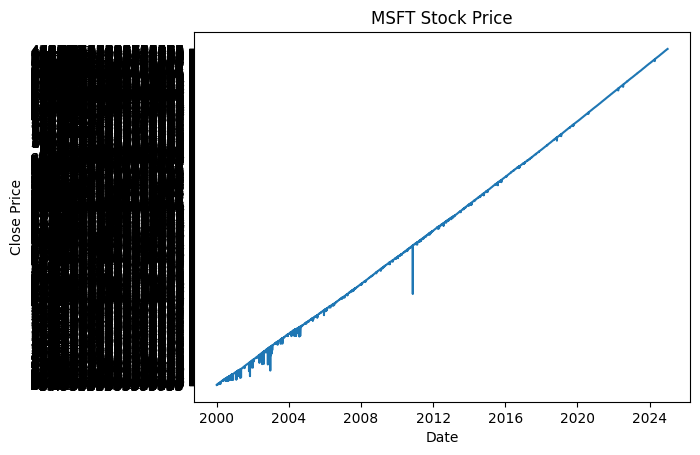

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with 'Date' as index and 'Close' as a column

# Convert the index to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(df.index):
    try:
        # Convert the entire index to datetime, handling potential errors
        df.index = pd.to_datetime(df.index, errors='coerce')
        #If errors='coerce', then invalid parsing will be set as NaT.
        # Remove rows with NaT in the index
        df = df[df.index.notna()]
    except pd.errors.ParserError:
        print("Error parsing index as datetime")
    df.index.name = 'Date'  # Rename index to 'Date'

# Now plot
plt.plot(df.index, df['Close'])
plt.xlabel("Date")  # Add label for x-axis
plt.ylabel("Close Price")  # Add label for y-axis
plt.title("MSFT Stock Price")  # Add title to the plot
plt.show()

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2000-02-01',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2000-02-01,30.322702407836914,30.169189453125,30.05402183532715,31.60854721069336
1,2000-02-02,30.169189453125,30.05402183532715,31.60854721069336,30.95603370666504
2,2000-02-03,30.05402183532715,31.60854721069336,30.95603370666504,31.819643020629883
3,2000-02-04,31.60854721069336,30.95603370666504,31.819643020629883,32.7216682434082
4,2000-02-07,30.95603370666504,31.819643020629883,32.7216682434082,32.7408561706543
...,...,...,...,...,...
5567,2022-03-17,269.4686279296875,279.9085388183594,286.96600341796875,287.7750244140625
5568,2022-03-18,279.9085388183594,286.96600341796875,287.7750244140625,292.85357666015625
5569,2022-03-21,286.96600341796875,287.7750244140625,292.85357666015625,291.6155700683594
5570,2022-03-22,287.7750244140625,292.85357666015625,291.6155700683594,296.3920593261719


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((5572,), (5572, 3, 1), (5572,))

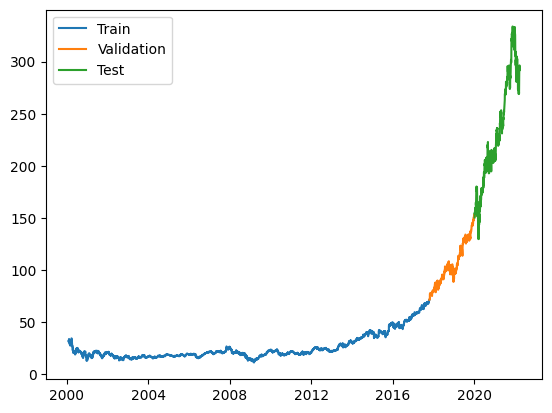

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 481.3158 - mean_absolute_error: 17.6238 - val_loss: 3640.3599 - val_mean_absolute_error: 56.7489
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.8838 - mean_absolute_error: 0.7517 - val_loss: 1900.8624 - val_mean_absolute_error: 38.5583
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3904 - mean_absolute_error: 0.4163 - val_loss: 1720.3699 - val_mean_absolute_error: 36.1877
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2570 - mean_absolute_error: 0.3539 - val_loss: 1629.5432 - val_mean_absolute_error: 34.9209
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2853 - mean_absolute_error: 0.3733 - val_loss: 1575.0547 - val_mean_absolute_error: 34.1637
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2690 - mean_absolute_error: 0.3518 - val_loss: 1547.2100 - val_mean_absolute_error: 33.7627
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.259

140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


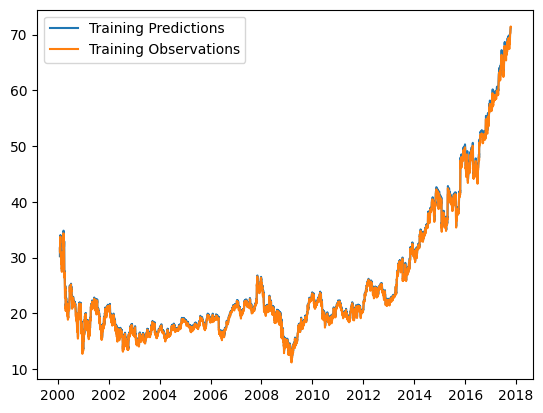

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


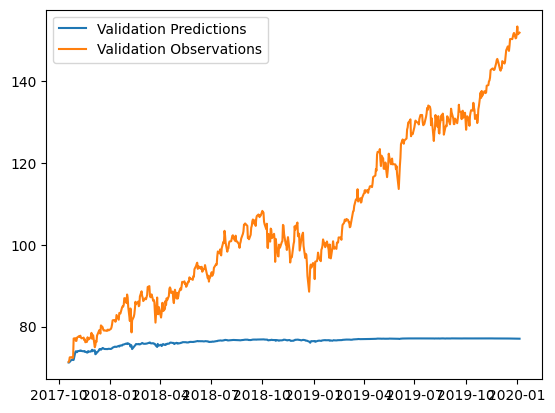

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


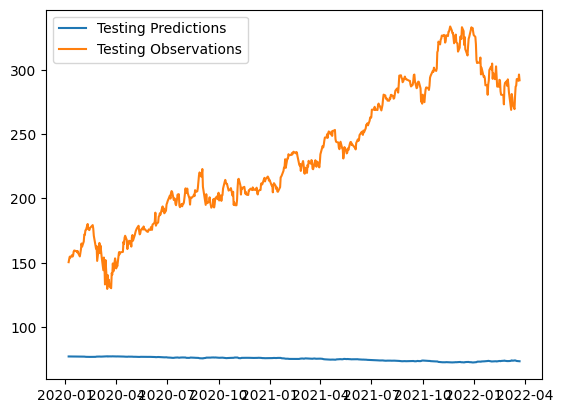

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

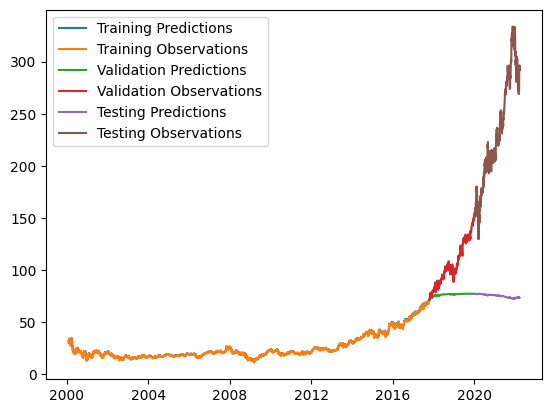

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━

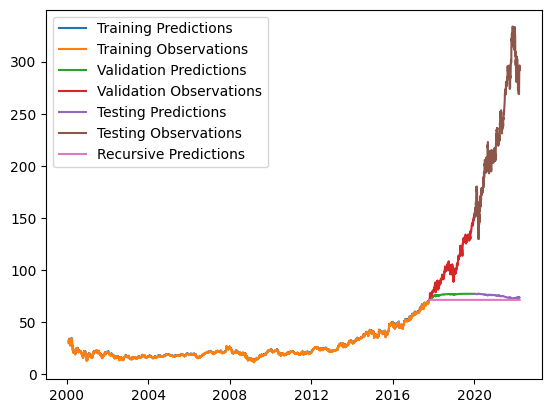

In [44]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])